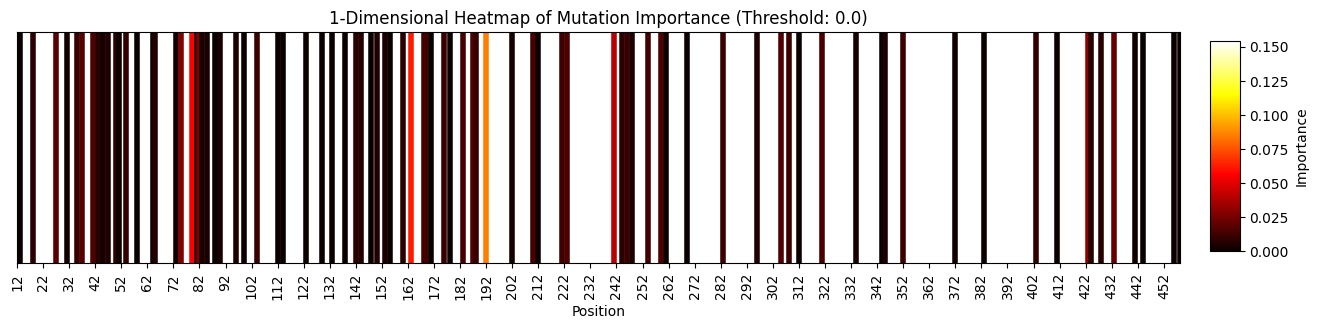

In [14]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

data = pd.read_csv('Mutation_loc_importance.csv')
threshold = 0.00  

# Filter the data to remove rows with 'Importance' less than the threshold
filtered_data = data[data['Importance'] >= threshold]


positions = filtered_data['Locations']
importances = filtered_data['Importance']

# Normalize the importance values for color mapping
norm = Normalize(vmin=importances.min(), vmax=importances.max())
cmap = plt.get_cmap('hot')

# Plotting data on a 1D heatmap
fig, ax = plt.subplots(figsize=(15, 3))

# Iterate over positions and their corresponding importance values
for pos, importance in zip(positions, importances):
    ax.axvline(x=pos, color=cmap(norm(importance)), linewidth=4)

# Set the range of x-axis to cover all positions
ax.set_xlim(positions.min(), positions.max())

# Set axis labels and title
ax.set_xlabel('Position')
ax.set_ylabel('Importance')
ax.set_title('1-Dimensional Heatmap of Mutation Importance (Threshold: {})'.format(threshold))

# Set custom tick labels for the x-axis
integer_positions = np.arange(int(positions.min()), int(positions.max()) + 1, 10)
ax.set_xticks(integer_positions)
ax.set_xticklabels(integer_positions, rotation=90)

# Remove y-axis as the importance is represented by color, not height
ax.yaxis.set_visible(False)

# Create a colorbar to indicate importance levels
cbar = ColorbarBase(ax=fig.add_axes([0.92, 0.15, 0.02, 0.7]), cmap=cmap, norm=norm)
cbar.set_label('Importance')

plt.show()
